In [6]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tweets = pd.read_csv('Tweets.csv', encoding = 'ISO-8859-1') UTF-8

In [8]:
tweets.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def preprocess_tweet_text(tweet):
    tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+" , '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    return " ".join(filtered_words)

In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
def preprocecss_tweet_text(tweet):
    tweet.lower()
    

In [19]:
tweets.text = tweets['text'].apply(preprocess_tweet_text)

In [20]:
tweets.text

0                                                What said
1            plus youve added commercials experience tacky
2         I didnt today Must mean I need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight Chicago
14636    leaving 20 minutes Late Flight No warnings com...
14637          Please bring American Airlines BlackBerry10
14638    money change flight dont answer phones Any sug...
14639    8 ppl need 2 know many seats next flight Plz p...
Name: text, Length: 14640, dtype: object

In [21]:
text = tweets.text
text

0                                                What said
1            plus youve added commercials experience tacky
2         I didnt today Must mean I need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight Chicago
14636    leaving 20 minutes Late Flight No warnings com...
14637          Please bring American Airlines BlackBerry10
14638    money change flight dont answer phones Any sug...
14639    8 ppl need 2 know many seats next flight Plz p...
Name: text, Length: 14640, dtype: object

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words = ' '.join(tweets['text'])

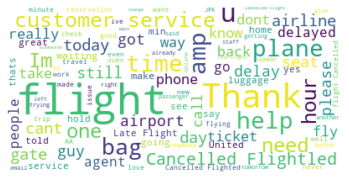

In [24]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = 'white').generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [25]:
tweets['airline_sentiment'].value_counts()/len(tweets)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [26]:
#lol

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()

compound = []
neg = []
neu = []
pos = []

for tweet in tweets['text']:
    sent = sid.polarity_scores(tweet)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
sid.polarity_scores("it was crazy fun")

{'neg': 0.312, 'neu': 0.26, 'pos': 0.429, 'compound': 0.2263}

In [33]:
tweets['compound'] = compound
tweets['neg'] = neg
tweets['neu'] = neu
tweets['pos'] = pos


In [34]:
tweets.head()

,airline_sentiment,airline,text,compound,neg,neu,pos
0,neutral,Virgin America,What said,0.0000,0.000,1.000,0.000
1,positive,Virgin America,plus youve added commercials experience tacky,0.0000,0.000,1.000,0.000
2,neutral,Virgin America,I didnt today Must mean I need take another trip,0.0000,0.000,1.000,0.000
3,negative,Virgin America,really aggressive blast obnoxious entertainmen...,-0.3306,0.345,0.468,0.187
4,negative,Virgin America,really big bad thing,-0.5829,0.557,0.443,0.000


In [35]:
y = tweets['airline_sentiment']
X = tweets[['compound', 'neg', 'neu', 'pos']]

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

In [37]:
rf.fit(X, y)

RandomForestClassifier()

In [38]:
cross_val_score(rf, X, y)

array([0.65778689, 0.65983607, 0.65744536, 0.68340164, 0.68032787])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 14)
rf.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 1.0, 'Confusion Matrix')

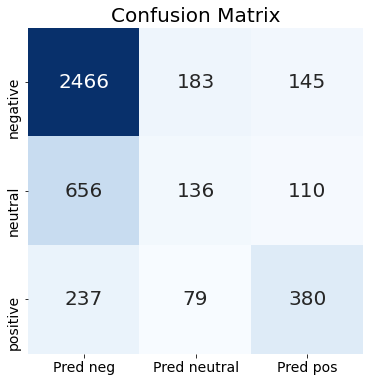

In [40]:
conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)

In [41]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.73      0.88      0.80      2794
     neutral       0.34      0.15      0.21       902
    positive       0.60      0.55      0.57       696

    accuracy                           0.68      4392
   macro avg       0.56      0.53      0.53      4392
weighted avg       0.63      0.68      0.64      4392



In [42]:
airline_sentiment = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


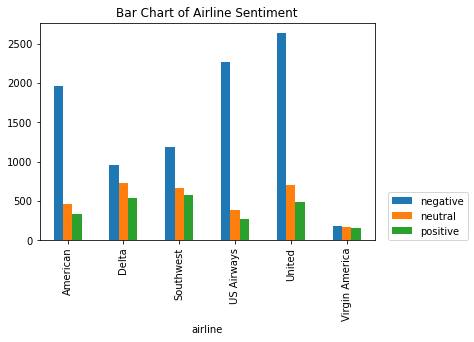

In [43]:
airline_sentiment.plot(kind='bar')
plt.legend(loc=(1.04,0))
plt.title('Bar Chart of Airline Sentiment')
plt.show()